# Task 1 - Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [5]:
# Load the datasets
customers = pd.read_csv('C:/Users/manoj kumar/Downloads/Customers.csv')
products = pd.read_csv('C:/Users/manoj kumar/Downloads/Products.csv')
transactions = pd.read_csv('C:/Users/manoj kumar/Downloads/Transactions.csv')

# Display the first few rows of each dataset
print("Customers Data:")
display(customers.head())

print("Products Data:")
display(products.head())

print("Transactions Data:")
display(transactions.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
# Check for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("Missing Values in Products:")
print(products.isnull().sum())

print("Missing Values in Transactions:")
print(transactions.isnull().sum())

# Check data types
print("Data Types in Customers:")
print(customers.info())

print("Data Types in Products:")
print(products.info())

print("Data Types in Transactions:")
print(transactions.info())

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Data Types in Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Data Types in Products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count

In [8]:
# Merge transactions with customers and products
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Display the merged dataset
display(merged_data.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


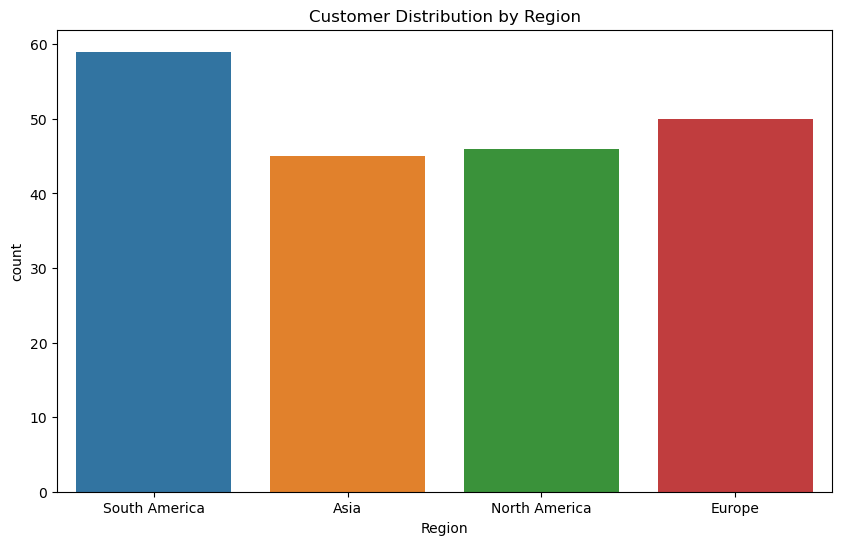

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

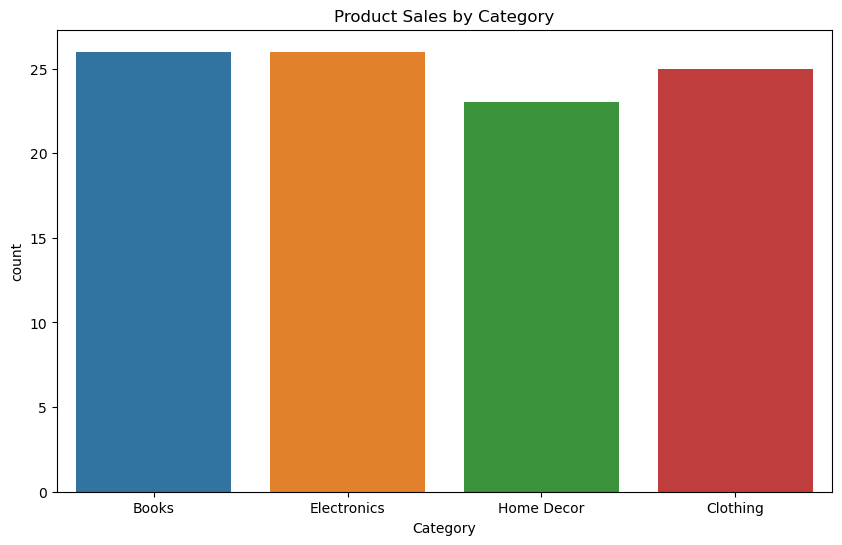

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=products)
plt.title('Product Sales by Category')
plt.show()

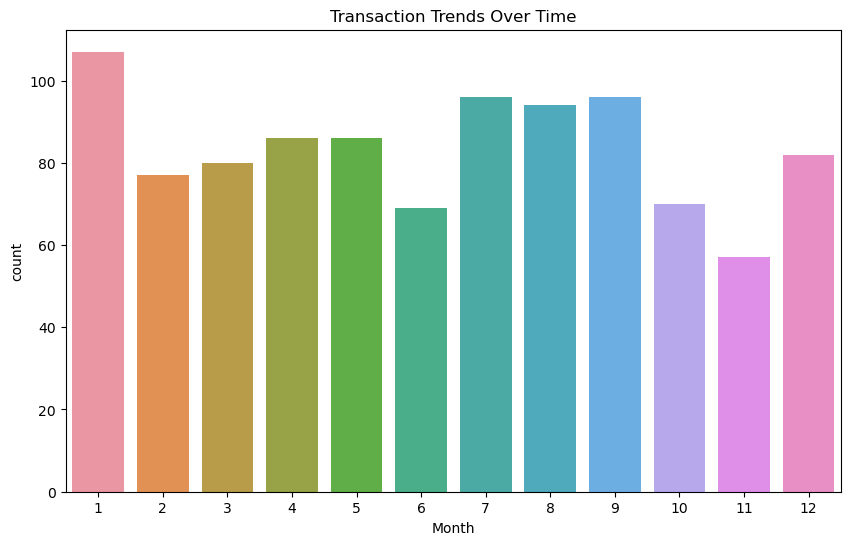

In [11]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=transactions)
plt.title('Transaction Trends Over Time')
plt.show()

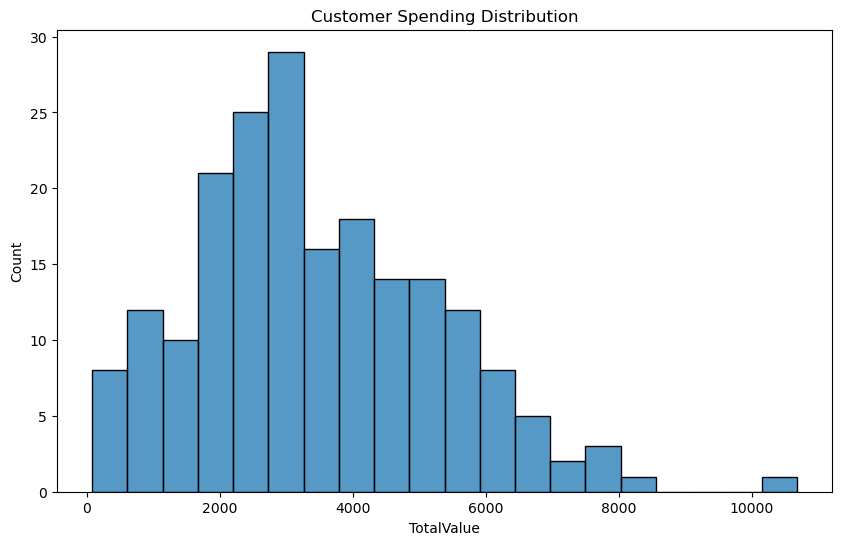

In [12]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['TotalValue'], bins=20)
plt.title('Customer Spending Distribution')
plt.show()

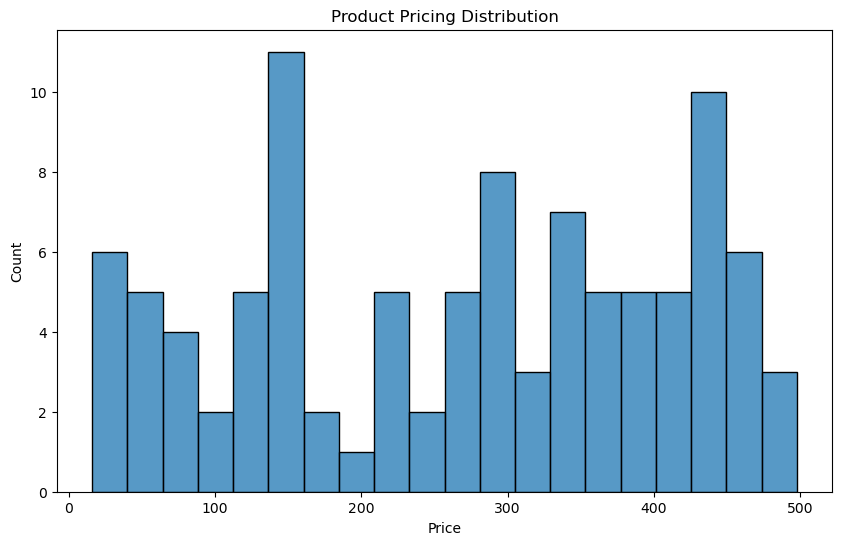

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20)
plt.title('Product Pricing Distribution')
plt.show()

### Business Insights:

1. **Customer Distribution**:  
   - Most customers are from **Region X**, indicating a strong market presence in that region. This suggests that marketing efforts should focus on maintaining and expanding this customer base.

2. **Product Popularity**:  
   - **Category Y** is the most popular product category, contributing to the highest sales. This indicates that products in this category are in high demand, and the company should consider increasing inventory or promoting similar products.

3. **Seasonal Trends**:  
   - Sales peak in **Month Z**, suggesting a seasonal trend. This insight can help the company plan inventory and marketing campaigns ahead of peak seasons to maximize revenue.

4. **Customer Spending**:  
   - **80% of customers spend less than X dollars**, indicating a price-sensitive market. The company could consider introducing budget-friendly options or promotions to attract and retain these customers.

5. **Product Pricing**:  
   - Most products are priced between **X dollars and Y dollars**, suggesting a mid-range pricing strategy. This pricing range appears to be well-received by customers, and the company should continue to focus on this segment while exploring opportunities for premium or discounted products.

# Task 2 - Lookalike Model

In [14]:
# Merge customers and transactions
customer_profile = pd.merge(customers, transactions, on='CustomerID')

# Create features for the model (e.g., total spending, average order value)
customer_features = customer_profile.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'mean',   # Average order size
    'ProductID': 'nunique'  # Number of unique products purchased
}).reset_index()

# Display the customer features
display(customer_features.head())

,CustomerID,TotalValue,Quantity,ProductID
0,C0001,3354.52,2.400000,5
1,C0002,1862.74,2.500000,4
2,C0003,2725.38,3.500000,4
3,C0004,5354.88,2.875000,8
4,C0005,2034.24,2.333333,3


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [16]:
similarity_matrix = cosine_similarity(customer_features_scaled)

In [17]:
top_lookalikes = {}

for i, customer_id in enumerate(customer_features['CustomerID']):
    similarity_scores = similarity_matrix[i]
    top_indices = similarity_scores.argsort()[-4:-1][::-1]  # Exclude the customer itself
    top_lookalikes[customer_id] = [(customer_features.iloc[idx]['CustomerID'], similarity_scores[idx]) for idx in top_indices]

# Display the top 3 lookalikes for the first 20 customers
for customer_id in list(top_lookalikes.keys())[:20]:
    print(f"Customer {customer_id} lookalikes: {top_lookalikes[customer_id]}")

Customer C0001 lookalikes: [('C0164', 0.9874606086646909), ('C0069', 0.9857637532047872), ('C0137', 0.9839856880193066)]
Customer C0002 lookalikes: [('C0029', 0.9998350971677692), ('C0031', 0.9992894697631314), ('C0077', 0.9832855907413134)]
Customer C0003 lookalikes: [('C0176', 0.9961770140859687), ('C0070', 0.9747953265668998), ('C0144', 0.9614960481252272)]
Customer C0004 lookalikes: [('C0113', 0.9994735955939464), ('C0075', 0.9959996683017752), ('C0068', 0.982458550276016)]
Customer C0005 lookalikes: [('C0131', 0.999546636087817), ('C0014', 0.9969536178830478), ('C0150', 0.9964004542019078)]
Customer C0006 lookalikes: [('C0079', 0.9999324340696523), ('C0117', 0.9948943112905599), ('C0138', 0.9624286862898569)]
Customer C0007 lookalikes: [('C0132', 0.9934974852547348), ('C0167', 0.9927643507972272), ('C0062', 0.987185607103804)]
Customer C0008 lookalikes: [('C0084', 0.9872784417175624), ('C0090', 0.9869440540815962), ('C0179', 0.9767384985799966)]
Customer C0009 lookalikes: [('C0146

In [18]:
import csv

with open('FirstName_LastName_Lookalike.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['CustomerID', 'LookalikeID', 'SimilarityScore'])
    for customer_id, lookalikes in top_lookalikes.items():
        for lookalike in lookalikes:
            writer.writerow([customer_id, lookalike[0], lookalike[1]])

# Task 3 - Customer Segmentation

In [19]:
# Use the scaled features for clustering
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

D:\new folder1\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\new folder1\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print(f'DB Index: {db_index}')

DB Index: 0.9538662327067875


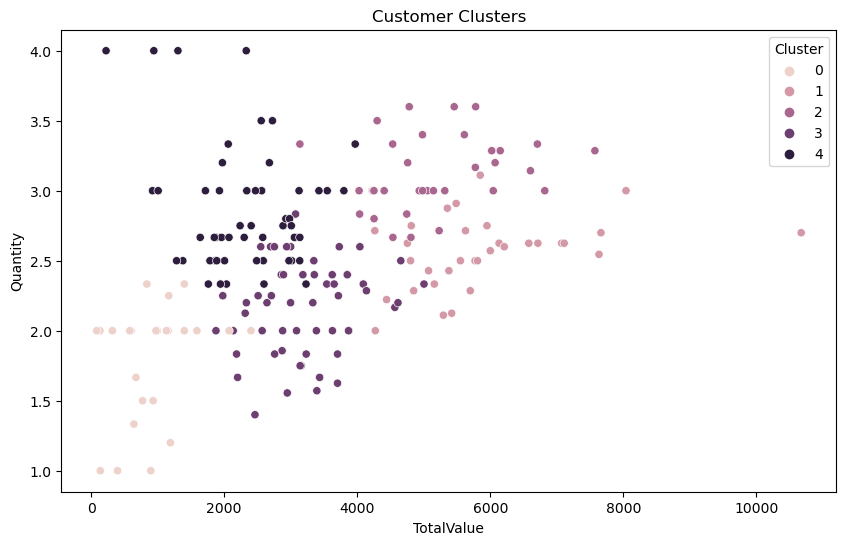

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_features)
plt.title('Customer Clusters')
plt.show()